In [1]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Used Google Colab, so mouting the drive
drive.mount('/content/drive')

# Dataset is uploaded in the Google Drive
datapath = '/content/drive/My Drive/Colab Notebooks/'
os.path.exists(datapath)

Mounted at /content/drive


True

In [2]:
# From the datapath, pandas is reading the csv file
def load_fire_data():
    return pd.read_csv(datapath + "fire_nrt_V1_96617.csv")

# Printing out some data to make sure it was pulled correctly
fire_archive_M6 = load_fire_data()
print(len(fire_archive_M6))
fire_archive_M6.head()

956257


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [3]:
# Checking the list of variables and their data type
fire_archive_M6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


# Using the matplotlib defaults

Text(0.5, 1.0, 'Australia Fire Default Graph')

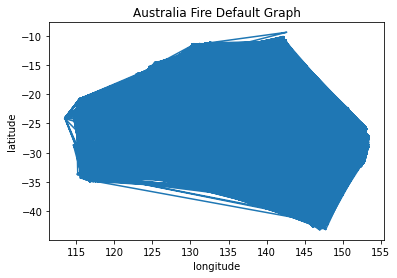

In [4]:
# Defining out default matplotlib plot and graphing it
fireLongitude = fire_archive_M6["longitude"]
fireLatitude = fire_archive_M6["latitude"]
plt.plot(fireLongitude, fireLatitude)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Fire Default Graph")

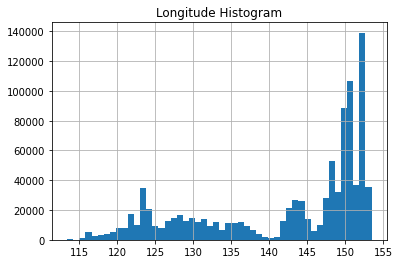

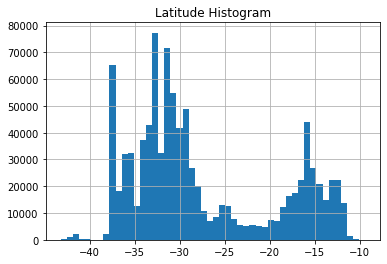

In [5]:
# Plotting a histogram for the longitude and latitude for the fire data
%matplotlib inline
fireLongitude.hist(bins=50)
plt.title("Longitude Histogram")
plt.show()

fireLatitude.hist(bins=50)
plt.title("Latitude Histogram")
plt.show()

# Adjusting alpha and marker size to compensate for overplotting.

Text(0.5, 1.0, 'Australia Fire Adjusted Overplotting Graph')

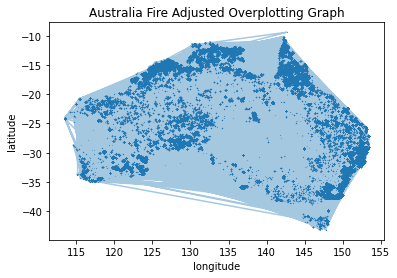

In [6]:
# Setting up a matplotlib plot for the latitude and longitude while adjusting the alpha for overplotting.
plt.plot(fireLongitude, fireLatitude, marker = "x", markersize = .6, alpha = .4)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Fire Adjusted Overplotting Graph")

Text(0.5, 1.0, 'Australia Fire Scatter Graph')

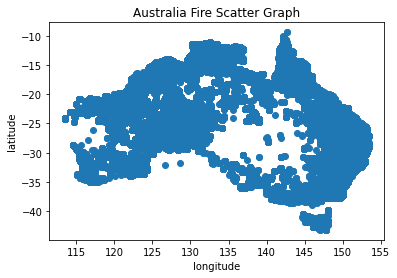

In [7]:
# Setting up a scatter plot to more clearly see the latitude and longitude for the data
plt.scatter(fireLongitude, fireLatitude)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Fire Scatter Graph")

Text(0.5, 1.0, 'Australia Fire Scatter Graph Adjusted Alpha = 0.1')

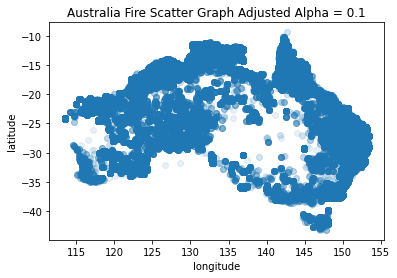

In [8]:
# Setting up a scatter plot to more clearly see the latitude and longitude for the data with an adjusted alpha for overplotting
plt.scatter(fireLongitude, fireLatitude, alpha=0.1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Fire Scatter Graph Adjusted Alpha = 0.1")

Text(0.5, 1.0, 'Australia Fire Scatter Graph Adjusted Alpha = 0.0025')

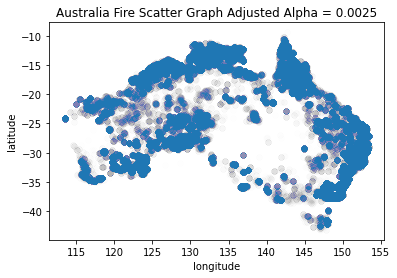

In [9]:
# Setting up a scatter plot to more clearly see the latitude and longitude for the data with even more adjusted alpha for overplotting
plt.scatter(fireLongitude, fireLatitude, alpha=0.0025)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Fire Scatter Graph Adjusted Alpha = 0.0025")

# Using a hexbin plot.

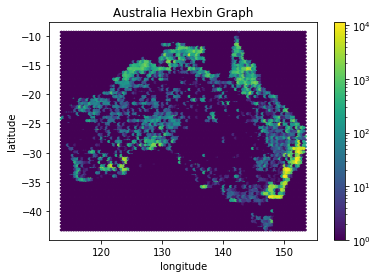

In [10]:
# Set up a hexbin plot for the longitude and latitude through log bins and added a colorbar to show density
plt.hexbin(fireLongitude, fireLatitude, gridsize = 100, bins = "log")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Hexbin Graph")
plt.colorbar()

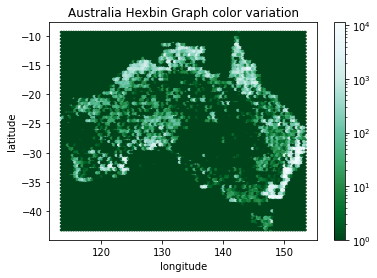

In [11]:
# Set up a hexbin plot for the longitude and latitude through log bins and added a colorbar to show density. Adjusted the color to try and get a better look.
plt.hexbin(fireLongitude, fireLatitude, cmap=plt.cm.BuGn_r, bins = "log")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Hexbin Graph color variation")
plt.colorbar()

# Subsampling the dataset.

Text(0.5, 1.0, 'Australia Subsampling Graph')

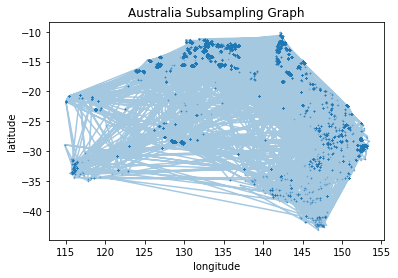

In [12]:
# Set up a matplotlib graph with a subset of the longitude and latitude
fireLongitudeSubset = fireLongitude[0 : 50000]
fireLatitudeSubset = fireLatitude[0 : 50000]

plt.plot(fireLongitudeSubset, fireLatitudeSubset, marker = "x", markersize = 1, alpha = .4)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Subsampling Graph")

Text(0.5, 1.0, 'Australia Subsampling Scatter Graph')

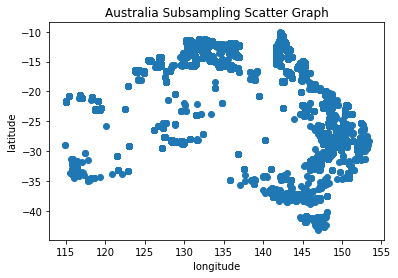

In [13]:
# Created a subset scatter matplotlib graph with the subset of the longitude and latitude 
plt.scatter(fireLongitudeSubset, fireLatitudeSubset)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Australia Subsampling Scatter Graph")

# Observations

* Based on the all the plots above we can see that most of the anomalies are located n the south-east region of Australia
* This is visible in the Hex Bin blot as well as the scatter plot with adjusted alpha 

# Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). 

Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.

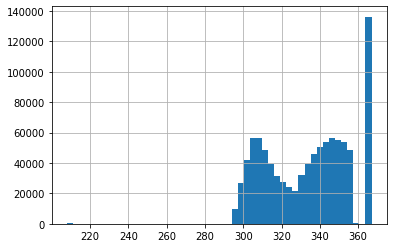

In [14]:
# With the fire data, created a histogram to see the distribution with the bright_ti4 variable
fire_archive_M6["bright_ti4"].hist(bins = 50)

# Plot of lat vs long for those points with brightness saturated and a separate for those who are not. 

Text(0.5, 1.0, 'Saturated Bright_ti4 Hexbin Graph')

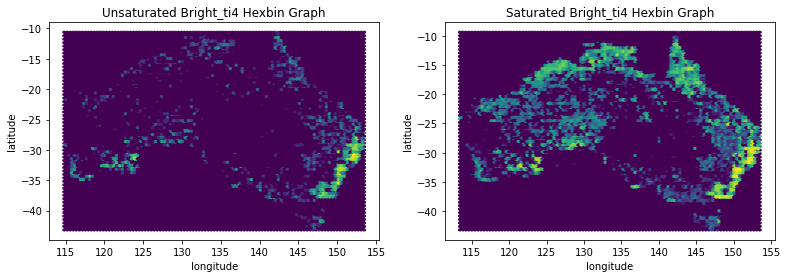

In [15]:
# Saturation level = 300 from class

# Setting up some variables for the saturated and unsaturated with the bright_ti4 variable
saturated = fire_archive_M6.loc[fire_archive_M6["bright_ti4"] > 300]
unsaturated = fire_archive_M6.loc[fire_archive_M6["bright_ti4"] < 300]

# With saturated and unsaturated variables, created some hexbin plots to see the distibution of the points
fig, axes = plt.subplots(1, 2, figsize = (13,4))
axes[0].hexbin(unsaturated["longitude"], unsaturated["latitude"], gridsize = 100, bins = "log")
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title("Unsaturated Bright_ti4 Hexbin Graph")

axes[1].hexbin(saturated["longitude"], saturated["latitude"], gridsize = 100, bins = "log")
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title("Saturated Bright_ti4 Hexbin Graph")

Text(0.5, 1.0, 'Saturated Bright_ti4 Scatter Graph')

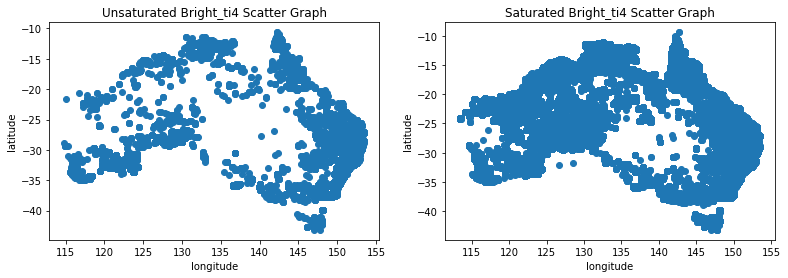

In [16]:
# # With saturated and unsaturated variables, created some scatter plots to see the distibution of the points
fig, axes = plt.subplots(1, 2, figsize = (13,4))
axes[0].scatter(unsaturated["longitude"], unsaturated["latitude"])
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title("Unsaturated Bright_ti4 Scatter Graph")

axes[1].scatter(saturated["longitude"], saturated["latitude"])
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title("Saturated Bright_ti4 Scatter Graph")

# Can we spot the difference in the distributions?
* Yes, we can see far less concentration of points in unsaturated graphs
* Saturated graphs higher concentrations and more number of points
* Both even have few overlaps i.e. same locations could have brightness variations that could move from unsaturated to saturated or vica-versa

# Plot both groups in the same axes with different colors.
# Also change the order of plotting the two classes.

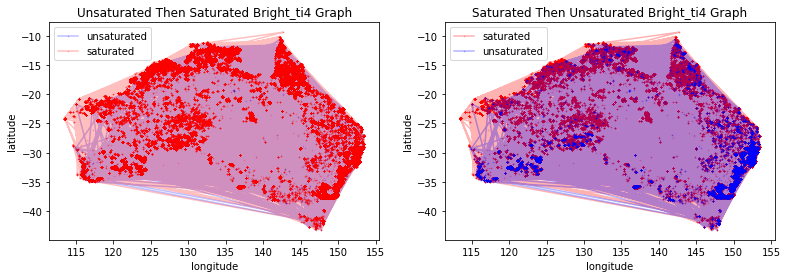

In [17]:
# With saturated and unsaturated variables, created some matplotlib plots to see the distibution of the points
fig, axes = plt.subplots(1, 2, figsize = (13,4))
axes[0].plot(unsaturated["longitude"], unsaturated["latitude"], color = "blue", alpha = 0.25, marker = "x", markersize = 1, label = "unsaturated")
axes[0].plot(saturated["longitude"], saturated["latitude"], color = "red", alpha = 0.25, marker = "x", markersize = 1, label = "saturated")
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title("Unsaturated Then Saturated Bright_ti4 Graph")
axes[0].legend(loc = "best");

axes[1].plot(saturated["longitude"], saturated["latitude"], color = "red", alpha = 0.3, marker = "x", markersize = 1, label = "saturated")
axes[1].plot(unsaturated["longitude"], unsaturated["latitude"], color = "blue", alpha = 0.3, marker = "x", markersize = 1, label = "unsaturated")
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title("Saturated Then Unsaturated Bright_ti4 Graph")
axes[1].legend(loc = "best");

# How does plotting both impact the result?
* Depending on whether the saturated or unsaturated data is plotted second. It will seems like that one is more prevalent in the plotted graph because of it being placed on top of the data that is plotted first.
* For Saturated on top, all unsaturated points are getting covered
* But when we plot unsaturated on top, we can see many unsaturated points in the graph

# Can we find a better way to compare the two distributions?
Another option to comapare the two regions will be to plot a scatter graph with adjusting alpha
* For saturated, we still have the overlapping
* But for unsaturated we can see more clear areas where they are located

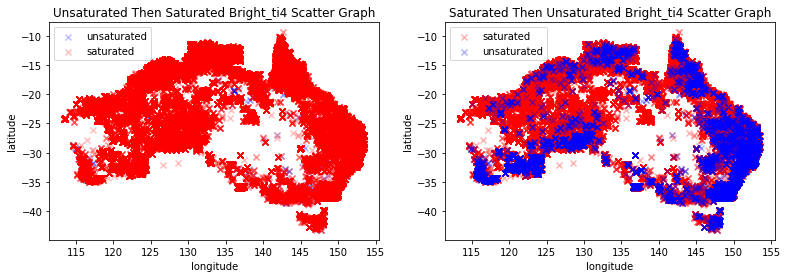

In [18]:
# With saturated and unsaturated variables, tried created some scatter plots to see the distibution of the points in a better way
fig, axes = plt.subplots(1, 2, figsize = (13,4))
axes[0].scatter(unsaturated["longitude"], unsaturated["latitude"], color = "blue", alpha = 0.25, marker = "x",  label = "unsaturated")
axes[0].scatter(saturated["longitude"], saturated["latitude"], color = "red", alpha = 0.25, marker = "x",  label = "saturated")
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title("Unsaturated Then Saturated Bright_ti4 Scatter Graph")
axes[0].legend(loc = "best");

axes[1].scatter(saturated["longitude"], saturated["latitude"], color = "red", alpha = 0.3, marker = "x",  label = "saturated")
axes[1].scatter(unsaturated["longitude"], unsaturated["latitude"], color = "blue", alpha = 0.3, marker = "x",  label = "unsaturated")
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title("Saturated Then Unsaturated Bright_ti4 Scatter Graph")
axes[1].legend(loc = "best");